In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(209)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.dpi'] = 300

Import csv dataset using `pd.read_csv`.

In [2]:
raw_df = pd.read_csv('data/NHANESI.csv')

Have a look at data

In [3]:
raw_df.describe()

sequence_ID          race  poverty_index           age  serum_albumin  \
count  14407.000000  14407.000000   11348.000000  14407.000000   10801.000000   
mean   13109.294093      1.174429     285.288597     48.944888       4.360467   
std     7376.747797      0.407539     223.320839     15.589963       0.329382   
min        1.000000      1.000000       2.000000     25.000000       2.700000   
25%     6711.500000      1.000000     129.000000     35.000000       4.200000   
50%    13313.000000      1.000000     229.000000     48.000000       4.400000   
75%    19835.500000      1.000000     358.000000     65.000000       4.600000   
max    25061.000000      3.000000     999.000000     75.000000       5.700000   

       alkaline_phosphatase         SGOT          BUN     calcium  \
count           6364.000000  6315.000000  2935.000000  6256.00000   
mean              60.204085     2.428643    14.807291     9.67102   
std               25.888013     1.489863     4.463475     0.47855   
min                4.800000     0.270000     0.800000     0.20000   
25%               45.000000     1.800000    12.000000     9.40000   
50%               57.000000     2.200000    14.000000     9.70000   
75%               70.000000     2.600000    17.000000    10.00000   
max              580.000000    31.000000    49.000000    12.50000   

        creatinine  ...  total_iron_binding_capacity  tranferrin_saturation  \
count  2591.000000  ...                 10149.000000            9932.000000   
mean      1.008066  ...                   362.766184              28.555910   
std       0.284178  ...                    59.968864              11.232671   
min       0.400000  ...                   112.000000               3.200000   
25%       0.900000  ...                   322.000000              21.000000   
50%       1.000000  ...                   356.000000              27.200000   
75%       1.100000  ...                   396.000000              34.600000   
max       9.000000  ...                   717.000000             100.000000   

           urine_pH  sedimentation_rate    uric_acid  systolic_blood_pressure  \
count  13695.000000        10308.000000  6651.000000             14339.000000   
mean       5.631179           16.182383     5.526643               134.169607   
std        0.774016           11.481789     1.470401                24.411942   
min        5.000000            1.000000     0.700000                80.000000   
25%        5.000000            7.000000     4.500000               118.000000   
50%        5.000000           14.000000     5.400000               130.000000   
75%        6.000000           22.000000     6.500000               148.000000   
max        9.000000           72.000000    12.500000               270.000000   

       pulse_pressure        weight        height             y  
count    14335.000000  14338.000000  14361.000000  14407.000000  
mean        50.667388     70.993984    166.254836     -9.109808  
std         18.027675     15.751339      9.175197     14.398436  
min         10.000000     27.900000    132.800000    -22.060274  
25%         38.000000     59.530000    159.500000    -19.885246  
50%         48.000000     69.170000    165.500000    -18.028288  
75%         60.000000     80.290000    172.700000      6.179078  
max        170.000000    181.440000    205.000000     21.474220  

[8 rows x 37 columns]

In [4]:
raw_df.head(10)

sequence_ID  sex_isFemale  race  poverty_index  age  serum_albumin  \
0        20751         False     1            NaN   51            NaN   
1        20753         False     1            NaN   41            NaN   
2        20754          True     3            NaN   31            NaN   
3        20755         False     1            NaN   48            NaN   
4        20756          True     1            NaN   29            NaN   
5        20758         False     2            NaN   51            NaN   
6        20759          True     1            NaN   36            NaN   
7        20760         False     1            NaN   50            NaN   
8        20761          True     2            NaN   63            NaN   
9        20763          True     1            NaN   33            NaN   

   alkaline_phosphatase  SGOT   BUN  calcium  ...  urine_glucose  urine_pH  \
0                  85.0   NaN  16.0     10.1  ...       Negative       5.0   
1                  68.0  2.27  16.0     10.2  ...       Negative       5.0   
2                  61.0  1.86  10.0      9.6  ...       Negative       6.0   
3                  58.0   NaN  12.0      9.7  ...       Negative       5.0   
4                  37.0  1.69  19.0      9.3  ...       Negative       5.0   
5                  61.0  9.46  14.0      9.5  ...       Negative       5.0   
6                  35.0   NaN  15.0      9.1  ...       Negative       7.0   
7                  99.0  2.47  23.0      8.8  ...       Negative       5.0   
8                  57.0  1.62  19.0      8.8  ...       Negative       5.0   
9                  45.0  0.55  12.0      9.2  ...       Negative       6.0   

   urine_hematest  sedimentation_rate  uric_acid  systolic_blood_pressure  \
0        Negative                 NaN        6.2                    110.0   
1        Negative                 NaN        7.7                    136.0   
2        Negative                 NaN        4.9                    110.0   
3        Negative                 NaN        8.4                    126.0   
4        Negative                 NaN        4.3                     98.0   
5        Negative                 NaN        9.0                    210.0   
6        Negative                 NaN        4.3                    108.0   
7        Negative                 NaN        5.4                    130.0   
8        Negative                 NaN        5.1                    140.0   
9        Negative                 NaN        5.4                    110.0   

   pulse_pressure  weight  height          y  
0            40.0   84.25   182.1 -16.951666  
1            54.0   87.09   188.2 -17.200299  
2            24.0   60.21   159.2 -17.630137  
3            36.0   88.22   175.6 -17.271368  
4            36.0   51.37   163.5 -17.131963  
5            74.0   89.13   170.3   3.186301  
6            40.0   77.79   183.5 -16.749465  
7            50.0   61.69   166.0 -17.030886  
8            60.0   53.07   148.3 -17.003496  
9            30.0   62.14   181.2 -17.014477  

[10 rows x 42 columns]

Transform categorical column values using `map`, usually used when merging two string features.

In [5]:
df = raw_df.copy()
columns_cat1 = ['race']
for col_name in columns_cat1:
    df[col_name] = df[col_name].map(lambda x: f'{col_name}_{x}', na_action='ignore')
    display(df[col_name].head(3))

0    race_1
1    race_1
2    race_3
Name: race, dtype: object

Check levels of categorical variables.

In [6]:
display(df['platelets_estimate'].value_counts())
display(df['urine_albumin'].value_counts())
display(df['urine_glucose'].value_counts())
display(df['urine_hematest'].value_counts())

Normal       5577
Increased     208
Decreased      65
Name: platelets_estimate, dtype: int64

Negative    13216
Trace         229
>=30          136
>=100          62
>=300          25
>=1000         13
Name: urine_albumin, dtype: int64

Negative    13284
Dark          136
Verydark       80
Medium         73
Light          59
Trace          47
Name: urine_glucose, dtype: int64

Negative     13141
Small          263
Moderate       143
Large           66
Verylarge        1
Trace            1
Name: urine_hematest, dtype: int64

Replace values.

In [7]:
cleanup_nums = {"sex_isFemale": {False: 'M', True: 'F'}}
df = df.replace(cleanup_nums)
df['sex_isFemale'].head()

0    M
1    M
2    F
3    M
4    F
Name: sex_isFemale, dtype: object

Change data type.

In [8]:
columns_cat2 = ['platelets_estimate', 'urine_albumin', 'urine_glucose',
                'urine_hematest','race','sex_isFemale']
df[columns_cat2] = df[columns_cat2].astype("category")
df.dtypes

sequence_ID                       int64
sex_isFemale                   category
race                           category
poverty_index                   float64
age                               int64
serum_albumin                   float64
alkaline_phosphatase            float64
SGOT                            float64
BUN                             float64
calcium                         float64
creatinine                      float64
potassium                       float64
sodium                          float64
total_bilirubin                 float64
serum_protein                   float64
red_blood_cells                 float64
white_blood_cells               float64
hemoglobin                      float64
hematocrit                      float64
platelets_estimate             category
segmented_neutrophils           float64
lymphocytes                     float64
monocytes                       float64
eosinophils                     float64
basophils                       float64


One-hot encode categorical variables and concate with the original data frame.

In [9]:
df = pd.get_dummies(df, columns=columns_cat2, prefix=columns_cat2)
df.head(10)
# not efficient code, but good to learn how to concat dataframe
# df = pd.concat([df] + [pd.get_dummies(df[col_name]) for col_name in columns_cat], axis=1)

sequence_ID  poverty_index  age  serum_albumin  alkaline_phosphatase  SGOT  \
0        20751            NaN   51            NaN                  85.0   NaN   
1        20753            NaN   41            NaN                  68.0  2.27   
2        20754            NaN   31            NaN                  61.0  1.86   
3        20755            NaN   48            NaN                  58.0   NaN   
4        20756            NaN   29            NaN                  37.0  1.69   
5        20758            NaN   51            NaN                  61.0  9.46   
6        20759            NaN   36            NaN                  35.0   NaN   
7        20760            NaN   50            NaN                  99.0  2.47   
8        20761            NaN   63            NaN                  57.0  1.62   
9        20763            NaN   33            NaN                  45.0  0.55   

    BUN  calcium  creatinine  potassium  ...  urine_hematest_Moderate  \
0  16.0     10.1         1.0        4.1  ...                        0   
1  16.0     10.2         0.9        4.4  ...                        0   
2  10.0      9.6         0.6        3.9  ...                        0   
3  12.0      9.7         1.1        4.2  ...                        0   
4  19.0      9.3         1.1        4.2  ...                        0   
5  14.0      9.5         1.0        4.2  ...                        0   
6  15.0      9.1         0.8        4.1  ...                        0   
7  23.0      8.8         1.0        4.3  ...                        0   
8  19.0      8.8         0.8        4.0  ...                        0   
9  12.0      9.2         1.0        3.8  ...                        0   

   urine_hematest_Negative  urine_hematest_Small  urine_hematest_Trace  \
0                        1                     0                     0   
1                        1                     0                     0   
2                        1                     0                     0   
3                        1                     0                     0   
4                        1                     0                     0   
5                        1                     0                     0   
6                        1                     0                     0   
7                        1                     0                     0   
8                        1                     0                     0   
9                        1                     0                     0   

   urine_hematest_Verylarge  race_race_1  race_race_2  race_race_3  \
0                         0            1            0            0   
1                         0            1            0            0   
2                         0            0            0            1   
3                         0            1            0            0   
4                         0            1            0            0   
5                         0            0            1            0   
6                         0            1            0            0   
7                         0            1            0            0   
8                         0            0            1            0   
9                         0            1            0            0   

   sex_isFemale_F  sex_isFemale_M  
0               0               1  
1               0               1  
2               1               0  
3               0               1  
4               1               0  
5               0               1  
6               1               0  
7               0               1  
8               1               0  
9               1               0  

[10 rows x 62 columns]

Calculate missing data ratio for each column, drop columns, `dropna` for deleting rows with NA.

In [10]:
missing_ratio = df.isna().sum(axis=0) / df.shape[0]
dropcol =  df.columns[missing_ratio >= 0.5]
df = df.drop(columns = list(dropcol) +  ['sequence_ID'])
df = df.dropna()

Create a new column with specified data type.

In [11]:
raw_df['Death'] = (raw_df['y'] > 0).astype('int')

Plots

In [12]:
colcat1 = ['poverty_index', 'race', 'weight', 'height', 'systolic_blood_pressure', 'pulse_pressure']
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
axs = axs.ravel()
for i, col_name in enumerate(colcat1):
    if col_name == 'race': # categorical
        percentage = (raw_df.groupby(['Death'])['race']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('race'))
        sns.barplot(x="race", y="percentage", hue="Death", data=percentage, ax = axs[i])
        # sns.countplot(data=raw_df, x=col_name, hue = 'Death',ax=axs[i])
    else:
        sns.kdeplot(data=raw_df, x=col_name, hue = 'Death', common_norm=False, ax=axs[i])

Use random forest to select important features.

In [13]:
rf = RandomForestRegressor()
rf.fit(df.drop(columns=['y']), df['y'])
var_imps = rf.feature_importances_

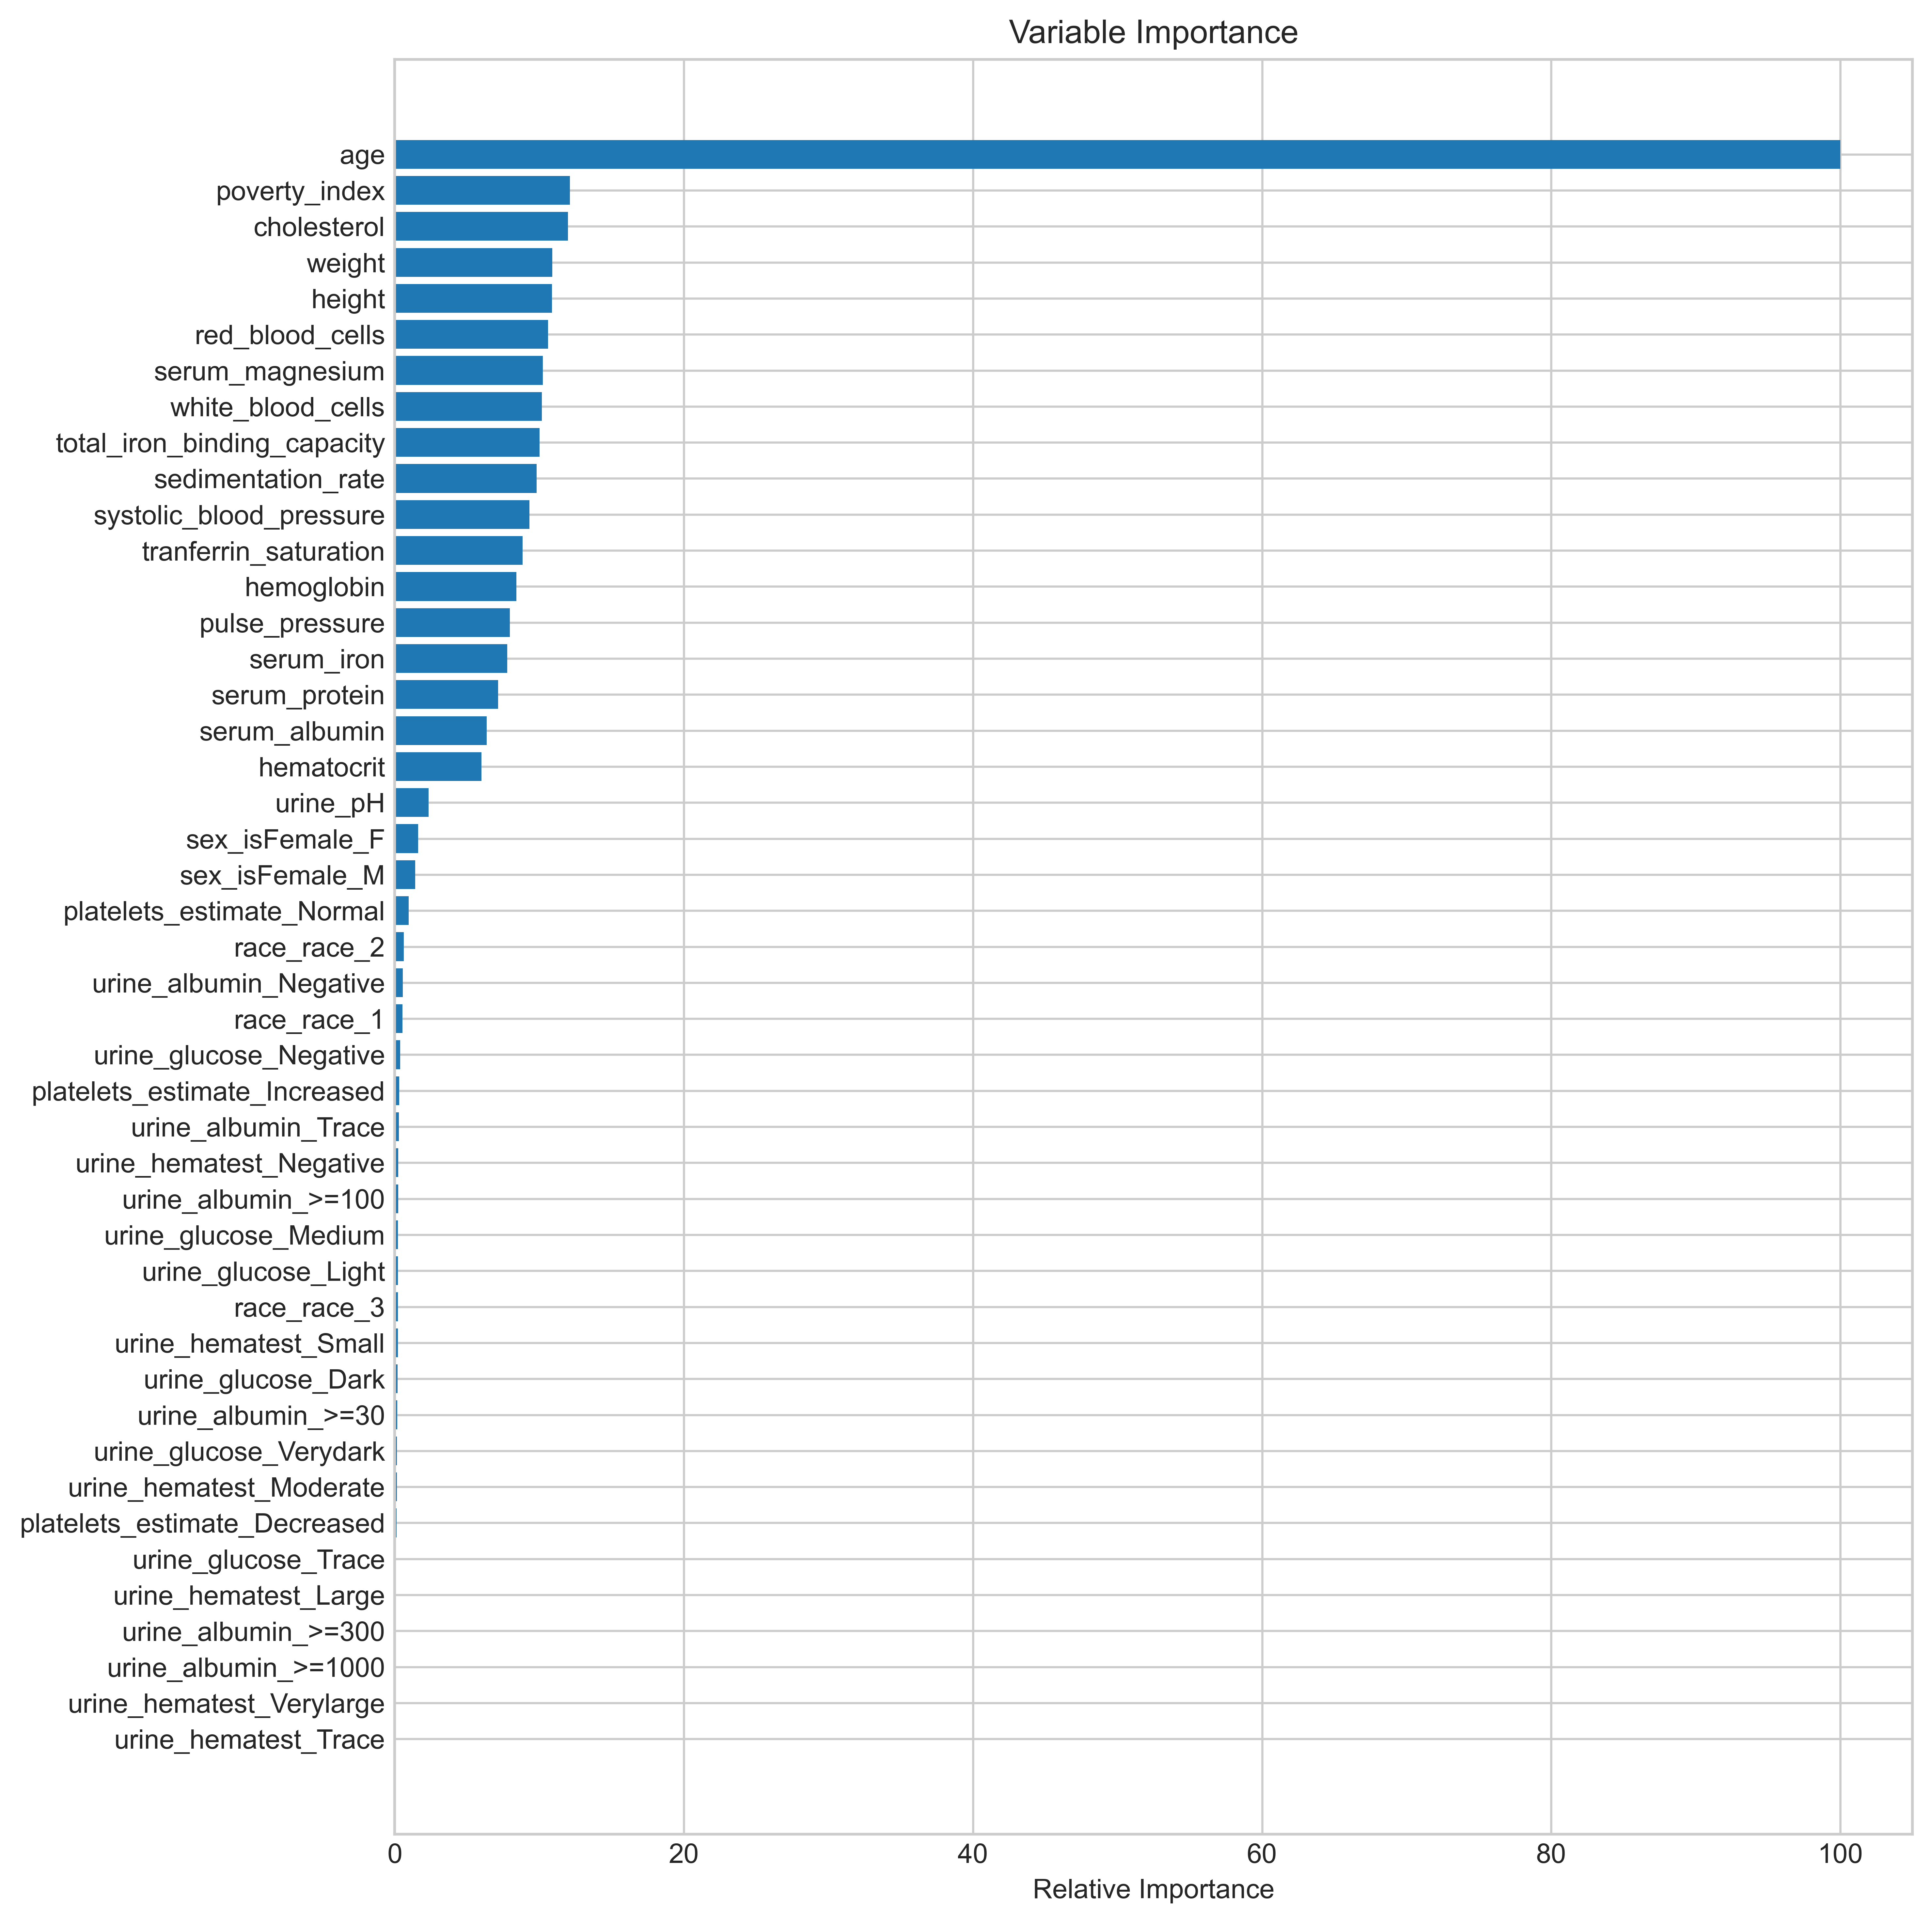

In [14]:
var_imps = 100.0 * (var_imps / var_imps.max())
sorted_idx = np.argsort(var_imps)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 12))
plt.barh(pos, var_imps[sorted_idx], align='center')
plt.yticks(pos, df.drop(columns=['y']).columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [15]:
columns_imp = df.drop(columns=['y']).columns[var_imps > 10]
display(len(columns_imp))
display(columns_imp)

9

Index(['poverty_index', 'age', 'red_blood_cells', 'white_blood_cells',
       'cholesterol', 'serum_magnesium', 'total_iron_binding_capacity',
       'weight', 'height'],
      dtype='object')

In [16]:
raw_df['pred_mortal'] = (raw_df['y'] > 0).astype('int')

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, col_name in enumerate(columns_imp[:18]):
    sns.kdeplot(data=raw_df, x=col_name, hue='pred_mortal', common_norm=False, ax=axs[i//3, i%3])

Baseline Model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['y']), df['y'], train_size=0.8)
baseline = RandomForestRegressor()
_ = baseline.fit(X_train, y_train)

In [18]:
y_train_pred = baseline.predict(X_train)
y_test_pred = baseline.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Train RMSE: {np.sqrt(train_mse):.4f}.')
print(f'Test RMSE: {np.sqrt(test_mse):.4f}.')

Train RMSE: 4.4384.
Test RMSE: 12.0974.
